### Motivation

1. The Customer Life Cycle and Problem Definition - Credit Card Approval - Basis available at UCI: http://archive.ics.uci.edu/ml/datasets/credit+approval
2. Deal with missing values
3. Convert categorical values to numerical values and exploratory data analysis (EDA)
4. Split the database between training and test
5. Logistic Regression Training
6. Evaluate the model

In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

%matplotlib inline

In [9]:
# Load database
base_cc = pd.read_csv("C:\\Users\\enzoa\\OMNP\\PY\\Base de Dados\\cc_approvals.data", header = None)

print(base_cc.head())
print("\n")
print(base_cc.tail(20))
print("\n")
print(base_cc.shape)
print("\n")
print(base_cc.info())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670  b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671  b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672  a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  

_____________________________________________________

### 2. Deal with Missing Values

In [11]:
# Check for missing values
print(base_cc.isnull().values.any())
print(base_cc.isna().values.any())

False
False


In [12]:
# Replace the "?"
base_cc = base_cc.replace("?",np.NaN)

print("\n")
print(base_cc.tail(20))



      0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670    b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671    b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672    a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  NaN  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674    a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675    a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676    a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677    b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678    a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679    a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680    b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681    b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682    b  

In [13]:
# Check for missing values
print(base_cc.isnull().values.any())
print(base_cc.isna().values.any())

# Now the methods can recognize it

True
True


In [15]:
# Deal with previous NaNs
base_cc = base_cc.fillna(method = 'ffill')

print(base_cc.count())  # checking that I have not removed any lines
base_cc.tail(20)  # método ffill = forward fill (fill in the value that is in front of it)

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,a,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [16]:
# The variable number 13 looks like a zip code. Remove it first
base_cc = base_cc.drop([base_cc.columns[13]], axis = 1)

base_cc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


In [21]:
# Naming columns
base_cc.columns = ["var1","var2","var3","var4","var5","var6"
                   ,"var7","var8","var9","var10","var11","var12","var13","var14","alvo"]

base_cc.head(1)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.0,1,0,12,7,1.25,1,1,1,0,0,0,0


_____________________________________________________

### 3. Convert categorical values to numerical values and exploratory data analysis (EDA)

In [19]:
# Use LabelEncoder
encoder = LabelEncoder()

# Transform the entire database
for variaveis in base_cc.columns:
    if base_cc[variaveis].dtype == 'object':
        base_cc[variaveis] = encoder.fit_transform(base_cc[variaveis])

In [20]:
base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


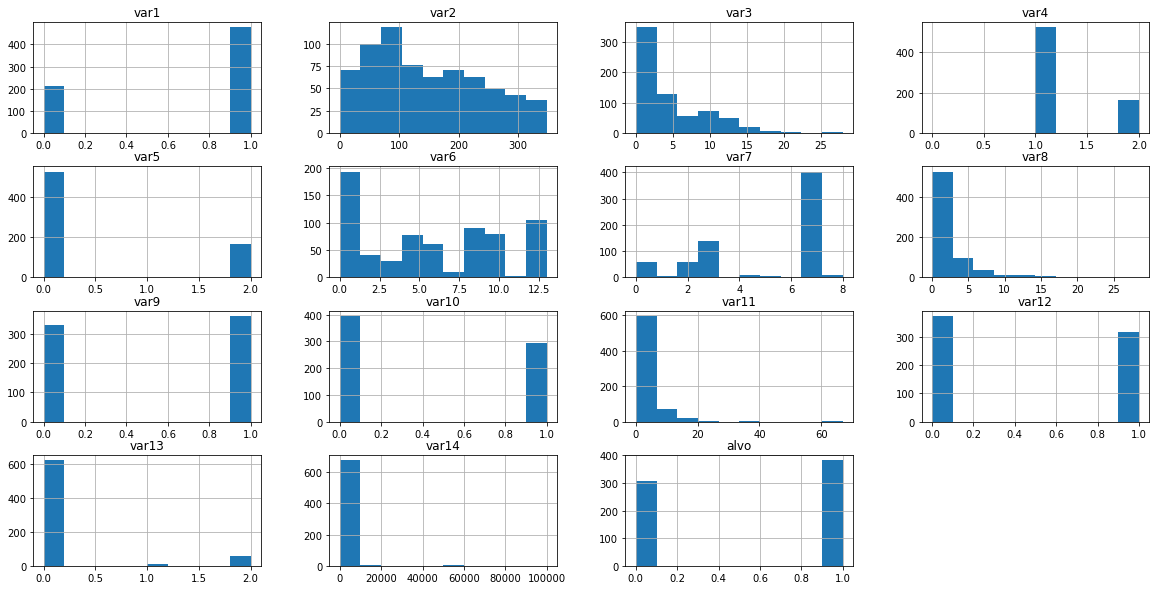

In [22]:
# Since all variables are numerical, we will plot their respective histograms
base_cc.hist()
plt.gcf().set_size_inches(20, 10)

In [23]:
base_cc[["var2", "alvo"]]

,var2,alvo
0,156,0
1,328,0
2,89,0
3,125,0
4,43,0
...,...,...
685,52,1
686,71,1
687,97,1
688,20,1


In [24]:
# Create ranges of the variable var2
var2_int = list(range(base_cc.var2.min(), base_cc.var2.max()+100, 50))

# Create the name of the intervals
nome_int = [f'var2_i{i}' for i in range(len(var2_int)-1)]

# Assign to the data frame
base_cc['var2_int'] = pd.cut(base_cc.var2, var2_int, labels = nome_int, include_lowest = True)

In [25]:
base_cc.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var2_i3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var2_i6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var2_i1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var2_i2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var2_i0


In [26]:
# Analyze var2 with a cross-tab
cross_cc = pd.crosstab(index = base_cc["alvo"], columns = base_cc["var2_int"])

cross_cc.index= ["Rejected","Accepted"]  # change index name

cross_cc

var2_int,var2_i0,var2_i1,var2_i2,var2_i3,var2_i4,var2_i5,var2_i6
Rejected,44,65,45,39,42,40,32
Accepted,79,91,62,61,45,26,19


In [27]:
# Deal with previous NaNs
base_cc = base_cc.fillna(method = 'ffill')

In [29]:
# Remove var2
base_cc = base_cc.drop("var2", axis=1)

base_cc.head()

,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var2_i3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var2_i6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var2_i1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var2_i2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var2_i0


In [30]:
# Since we have created a new variable, we want to check its type
print(base_cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   var1      690 non-null    int32   
 1   var3      690 non-null    float64 
 2   var4      690 non-null    int32   
 3   var5      690 non-null    int32   
 4   var6      690 non-null    int32   
 5   var7      690 non-null    int32   
 6   var8      690 non-null    float64 
 7   var9      690 non-null    int32   
 8   var10     690 non-null    int32   
 9   var11     690 non-null    int64   
 10  var12     690 non-null    int32   
 11  var13     690 non-null    int32   
 12  var14     690 non-null    int64   
 13  alvo      690 non-null    int32   
 14  var2_int  690 non-null    category
dtypes: category(1), float64(2), int32(10), int64(2)
memory usage: 49.7 KB
None


In [33]:
# Convert dtype category to numeric - use a dictionary
categorias = {"var2_int": {"var2_i0": 0, "var2_i1": 1, "var2_i2" : 2
                           , "var2_i3" : 3, "var2_i4" : 4, "var2_i5" : 5, "var2_i6" : 6}}

base_cc.replace(categorias, inplace = True)
print(base_cc.info())
base_cc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var1      690 non-null    int32  
 1   var3      690 non-null    float64
 2   var4      690 non-null    int32  
 3   var5      690 non-null    int32  
 4   var6      690 non-null    int32  
 5   var7      690 non-null    int32  
 6   var8      690 non-null    float64
 7   var9      690 non-null    int32  
 8   var10     690 non-null    int32  
 9   var11     690 non-null    int64  
 10  var12     690 non-null    int32  
 11  var13     690 non-null    int32  
 12  var14     690 non-null    int64  
 13  alvo      690 non-null    int32  
 14  var2_int  690 non-null    int64  
dtypes: float64(2), int32(10), int64(3)
memory usage: 54.0 KB
None


,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2_int
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0


_____________________________________________________

### 4. Split the database between training and test

In [35]:
# Split the data with the variables in x and the target in y
x = base_cc.drop("alvo", axis = 1)
y = base_cc["alvo"]

# Split training from testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

_____________________________________________________

### 5. Logistic Regression Training (statsmodels)

In [39]:
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())
print("\n")
print('Parameters: ', reg_log.params)
print("\n")
print("Odds ratio")  # logistic regression needs to transform the parametrics to interpret them
print(np.exp(reg_log.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   alvo   No. Observations:                  345
Model:                            GLM   Df Residuals:                      330
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.17
Date:                Mon, 07 Mar 2022   Deviance:                       212.35
Time:                        11:58:51   Pearson chi2:                     305.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4721   1.18e+04      0.002      0.9

_____________________________________________________

### 6. Evaluate the model

In [41]:
# Predict on the training and test database
y_pred_train = reg_log.predict(x_train_)
y_pred_test = reg_log.predict(x_test_)

# Calculate the ROC and the Gini - training
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.940155
Gini - Treinamento:  0.88


AUC - Teste : 0.904773
Gini - Teste:  0.81


In [42]:
# Now it is very important! (requires knowledge of the business)
# What is the best cut-off point for accepting a credit card application?
# -> The intersection between True Positive Rate and False Positive Rate - where TPR is highest and FPR is lowest

i = np.arange(len(tpr_train))
roc_train = pd.DataFrame({'fpr' : pd.Series(fpr_train, index=i)
                    , 'tpr' : pd.Series(tpr_train, index = i)
                    , '1-fpr' : pd.Series(1-fpr_train, index = i)
                    , 'tf' : pd.Series(tpr_train - (1-fpr_train), index = i)
                    , 'thresholds' : pd.Series(thresholds_train, index = i)})

print(round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:1]],3))
print("\n")
print("Ponto de corte otimo: 0.425 ")

      fpr    tpr  1-fpr     tf  thresholds
33  0.124  0.875  0.876 -0.001       0.425


Ponto de corte otimo: 0.425 


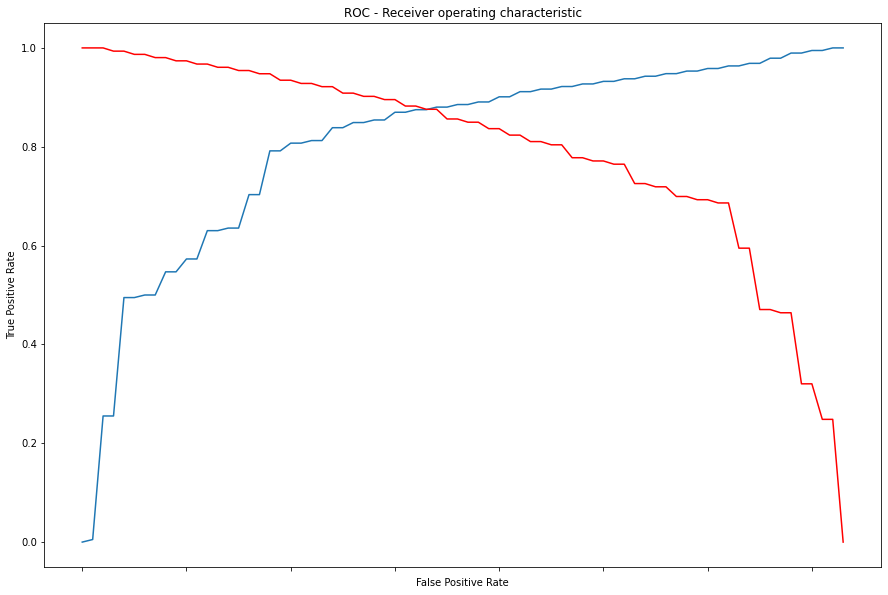

In [43]:
# Plot the ROC (AUC) - Training
fig, ax = plt.subplots()
plt.plot(roc_train['tpr'])
plt.plot(roc_train['1-fpr'], color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
ax.set_xticklabels([]);
plt.gcf().set_size_inches(15, 10)

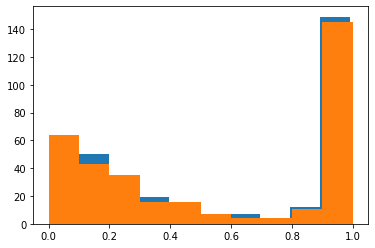

In [44]:
# Set the cut-off point
cutoff = 0.425

# But beware: see that the final scores are not so granular (small base/few variables)
# And there is concentration on the 1

plt.hist(y_pred_train)
plt.hist(y_pred_test);

# the effect here will be limited by the example, but on larger bases the impact is enormous

In [45]:
# Pre-processing for the confusion matrix - Data must be binary
from sklearn.metrics import confusion_matrix

y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test

# Transform all the training probabilities
for score in range(0, len(y_pred_train-1)):
    if y_pred_train.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1
    else:
        y_pred_train_bin.iloc[score] = 0
        

# Transform all the test probabilities
for score in range(0, len(y_pred_test-1)):
    if y_pred_test.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1
    else:
        y_pred_test_bin.iloc[score] = 0

In [46]:
# Evaluate training results
print("Avaliando a base de treinamento:")
print(confusion_matrix(y_train, y_pred_train_bin))
print("\n")

# Evaluate test results
print("Avaliando a base de test:")
print(confusion_matrix(y_test, y_pred_test_bin))

Avaliando a base de treinamento:
[[135  18]
 [ 24 168]]


Avaliando a base de test:
[[130  24]
 [ 29 162]]
